In [0]:
#import packages required
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [0]:
#open the data file as a dataframe
census=pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
#show the first several rows
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## **2. Finding Optimal Value of a key Hyper-parameter**


For Ensemble Models, one of the key hyper-parameter is number of “estimators”.
Following is an example of fining the optimal value of “Maximum Depth”. Review the following code snippet to understand how the optimal value of this hyper-parameter (Max Depth = 10) is found by plotting a graph.

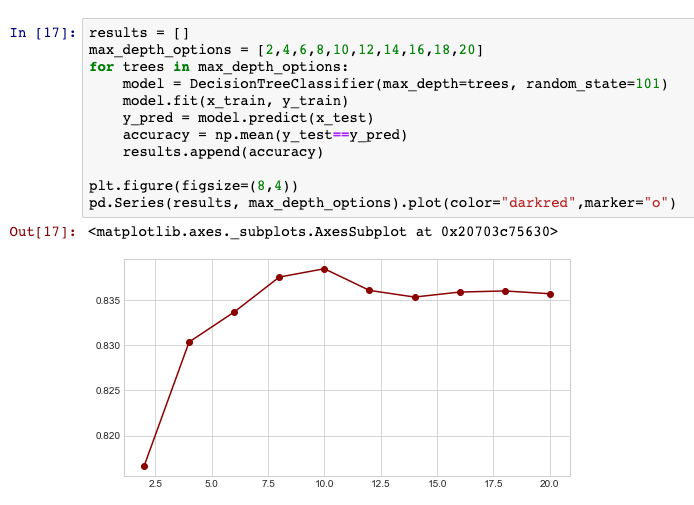

## **3. Building a Random Forest Model**

Using Notebook, and the same data source from CA03, train a Random Forest Model.
Using similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator.
Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

In [0]:
#Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.
print(census.isnull().sum())
print(census.info())
#no missing values like NaN is dectected
census.describe(exclude=[np.number])

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
hours_per_week_bin    48842 non-null object
occupation_bin        48842 non-null object
msr_bin               48842 non-null object
capital_gl_bin        48842 non-null object
race_sex_bin          48842 non-null object
education_num_bin     48842 non-null object
education_bin         48842 non-null object
workclass_bin         48842 non-null object
age_bin               48842 non-null object
flag                  48842 non-null object
y                     48842 non-null int64
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


In [0]:
#create a copy of the dataframe to factorize
census_fact=census.copy()[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
for col in census_fact.columns:
  census_fact[col]=pd.factorize(census_fact[col])[0]

#factorize() is so good at factorizing but so weak at recognizing transformation of values
#have to manually check on which variable is factorized as 0,1,2...

#add flag and y back so we can still know how to split data with outcomes
census_fact['flag']=census['flag']
census_fact['y']=census['y']

census_fact.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin,flag,y
0,0,0,0,0,0,0,0,train,0
1,1,1,1,1,0,0,1,train,0
2,0,2,0,1,0,1,0,train,0
3,0,2,1,1,1,2,1,train,0
4,0,1,1,1,2,0,2,train,0


In [0]:

#splitting the train and test dataset
train_data=census_fact[census_fact['flag']=='train']
test_data=census_fact[census_fact['flag']=='test']

#selecting independant and dependant variables
X_train = train_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
Y_train = train_data['y']
X_test=X = test_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
Y_test = test_data['y']

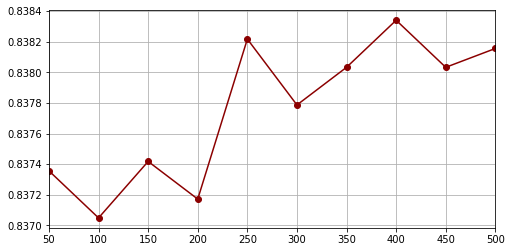

In [0]:
import sklearn.ensemble
import pandas as pd
import numpy as np



#set up before drawing the line
estimator_range=list(range(50,550,50))
accuracy_results_rfc=[]

for tree_num in estimator_range:
  model_rfc=sklearn.ensemble.RandomForestClassifier(n_estimators=tree_num,random_state=100)
  model_rfc.fit(X_train,Y_train)
  y_pred=model_rfc.predict(X_test)

  accuracy=np.mean(Y_test==y_pred)
  accuracy_results_rfc.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(accuracy_results_rfc,estimator_range).plot(color='darkred',marker='o')
plt.grid()

plt.show()


Answer the following question:

1. Write your observations about the Classifier’s behavior with respect to the
number of estimators

2. Is there an optimal value of the estimator within the given range?

3.1
The accuracy is increasing while the number of trees is increasing, but could not be improved while the accuracy has reach 250 and show some ups and downs.

3.2
The estimators 250 or 400 show greatest results which are at the middle of the range, thus these estimators are believed to be the best in this range of estimators.

## **4. Building AdaBoost, Gradient Boost (classifier) and XGB Model**

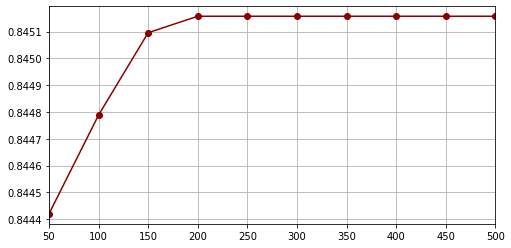

In [0]:
#AdaBoost

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


#set up before drawing the line
estimator_range=list(range(50,550,50))
accuracy_results_abc=[]

for tree_num in estimator_range:
  model_abc=AdaBoostClassifier(n_estimators=tree_num,random_state=100)
  model_abc.fit(X_train,Y_train)
  y_pred=model_abc.predict(X_test)

  accuracy=np.mean(Y_test==y_pred)
  accuracy_results_abc.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(accuracy_results_abc,estimator_range).plot(color='darkred',marker='o')
plt.grid()

plt.show()

It is very clear that as n_estimators is allowed to be larger, the accuracy is increasing significant However, the accuracy is not increasing for the model after the n_estimator has reached to 200. Optimal estimator shall be over 200.

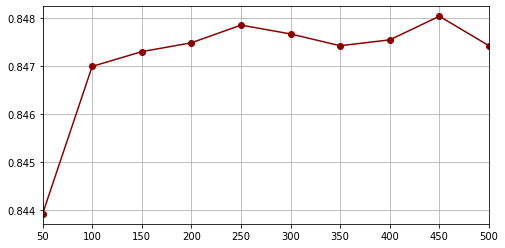

In [0]:
#Gradient Boost classifier

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


#set up before drawing the line
estimator_range=list(range(50,550,50))
accuracy_results_gbc=[]

for tree_num in estimator_range:
  model_gbc=GradientBoostingClassifier(n_estimators=tree_num,random_state=100)
  model_gbc.fit(X_train,Y_train)
  y_pred=model_gbc.predict(X_test)

  accuracy=np.mean(Y_test==y_pred)
  accuracy_results_gbc.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(accuracy_results_gbc,estimator_range).plot(color='darkred',marker='o')
plt.grid()

plt.show()

Like the AdaBoost model, the accuracy is increasing as the n_estimators gets larger, but shows some vibration after the n_estimator is greater than 100. Optimal estimator shall be 250 or 450.

In [0]:
!pip install xgboost

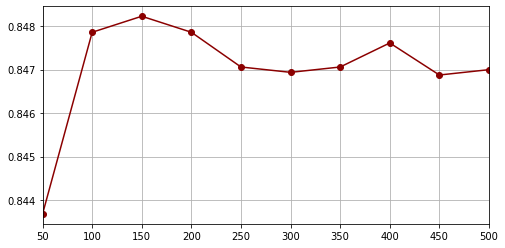

In [0]:
from sklearn import datasets
import xgboost as xgb

#set up before drawing the line
estimator_range=list(range(50,550,50))
accuracy_results_xgbc=[]


for tree_num in estimator_range:
  model_xgbc=xgb.XGBClassifier(n_estimators=tree_num,random_state=100)
  model_xgbc.fit(X_train,Y_train)
  y_pred=model_xgbc.predict(X_test)

  accuracy=np.mean(Y_test==y_pred)
  accuracy_results_xgbc.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(accuracy_results_xgbc,estimator_range).plot(color='darkred',marker='o')
plt.grid()

plt.show()


#below are xgb, not xgb classifier
#param = {
#    'eta':0.3,
#    'max_depth':3,
#    'objective':'multi:softprob',
#    'num_class':3
#}

#D_train = xgb.DMatrix(X_train, label=Y_train)
#D_test = xgb.DMatrix(X_test, label=Y_test)
#step_range=list(range(2,22,2))
#  model_xgb= xgb.train(param,D_train,step_num)
#  y_pred= model_xgb.predict(D_test)

Like the previous models, XGB Classifier is mainly showing an increasing trend within the range, but the accuracy is decreased when the estimator is greater than 150. Optimal n_estimator shall be 100 to 200. 

## **5. Compare Performance**

In [0]:
#As the graphs show before, 250 seems to be the best estimator for all
#models for comparison of the best results.

tree_num_comparison=250
random_state_comparison=100

#random forest
rfc=[]
model_rfc=sklearn.ensemble.RandomForestClassifier(n_estimators=tree_num_comparison,random_state=random_state_comparison)
model_rfc.fit(X_train,Y_train)
y_pred=model_rfc.predict(X_test)

accuracy=np.mean(Y_test==y_pred)
rfc.append(accuracy)

y_pred_prob = model_abc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
rfc.append(roc_auc)

#adaboost
abc=[]
model_abc=AdaBoostClassifier(n_estimators=tree_num_comparison,random_state=random_state_comparison)
model_abc.fit(X_train,Y_train)
y_pred=model_abc.predict(X_test)
accuracy=np.mean(Y_test==y_pred)
abc.append(accuracy)

y_pred_prob = model_abc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
abc.append(roc_auc)


#gradient boost
gbc=[]
model_gbc=GradientBoostingClassifier(n_estimators=tree_num_comparison,random_state=random_state_comparison)
model_gbc.fit(X_train,Y_train)
y_pred=model_gbc.predict(X_test)
accuracy=np.mean(Y_test==y_pred)
gbc.append(accuracy)

y_pred_prob = model_gbc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
gbc.append(roc_auc)




#xgb classifier
xgbc=[]
model_xgbc=xgb.XGBClassifier(n_estimators=tree_num_comparison,random_state=random_state_comparison)
model_xgbc.fit(X_train,Y_train)
y_pred=model_xgbc.predict(X_test)
accuracy=np.mean(Y_test==y_pred)
xgbc.append(accuracy)

y_pred_prob = model_xgbc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
xgbc.append(roc_auc)

#building dataframe
data_dict={'Random Forest':rfc,'AdaBoost':abc,'Gradient Boost':gbc,'XGB':xgbc}
df=pd.DataFrame(data=data_dict,index=['Accuracy','AUC'])
print(df)
print('n_estimator: ',tree_num_comparison)
print('random_state: ',random_state_comparison)

          Random Forest  AdaBoost  Gradient Boost       XGB
Accuracy       0.838216  0.845157        0.847859  0.847061
AUC            0.897428  0.897428        0.898840  0.899351
n_estimator:  250
random_state:  100
